Name : Piyush Prashant



Email : lnu.pi@husky.neu.edu

In [1]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np
# !pip install folium

# Visualization Libraries
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Libraries for Machine Learning
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 

import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import seaborn as sns
%matplotlib inline


In [2]:
def read_csv(pathtofile):
    '''
    params : Path to File
    returns : CSV loaded in a Pandas Dataframe
    '''
    dataframe = pd.read_csv(pathtofile)
    return dataframe

In [100]:
ipfile = 'apt_pricing.csv'
df = read_csv(ipfile)

In [101]:
df.head()

,longitude,latitude,apt_median_age,total_rooms,total_bedrooms,population,households,median_income,median_apt_value,location
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [102]:
def print_unique_values(dataframe,columns_list):
    for column in columns_list:
        print(str(column) + ':' + ' ' +  str(len(dataframe[column].unique())) + ' ' + 'values')
    return None

In [103]:
print_unique_values(df,df.columns)

longitude: 844 values
latitude: 862 values
apt_median_age: 52 values
total_rooms: 5926 values
total_bedrooms: 1924 values
population: 3888 values
households: 1815 values
median_income: 12928 values
median_apt_value: 3842 values
location: 5 values


In [104]:
def return_shape_dataframe(dataframe):
    '''
    params : A Dataframe
    returns: Shape of the dataframe
    '''
    return dataframe.shape

In [105]:
return_shape_dataframe(df)

(20640, 10)

#### Question - <B>Identify which column has missing values. What is your strategy for dealing with those values ?<b>

In [106]:
def return_nulls(dataframe):
    '''
    params : A Dataframe 
    returns : Filtered Dataframe with columns having a null count
    '''
    return dataframe.isnull().sum()

In [107]:
return_nulls(df)

longitude             0
latitude              0
apt_median_age        0
total_rooms           0
total_bedrooms      207
population            0
households            0
median_income         0
median_apt_value      0
location              0
dtype: int64

In [108]:
def drop_nulls(dataframe):
    '''
    params : A dataframe 
    returns : A dataframe with no null values
    '''
    return dataframe.dropna(inplace=True)

####  ****Since the number nullls for total_bedrooms is really low compared to total value we can drop those rows

In [109]:

drop_nulls(df)

## Questions
#### The 'location' column is text. Modify it so you can use it as a numerical feature. 
#### Your new dataframe should consist of all the previous numerical columns as well as the new modified features for the "ocean_proximity" column.

In [110]:
def get_dummies(dataframe,col_name):
    '''
    params : A dataframe and a column name whose dummies are required
    returns : A dataframe with dummies of the column specified
    '''
    return pd.get_dummies(dataframe, columns=[col_name])

In [111]:
df = get_dummies(df,'location')

In [112]:
def get_corr_plot(dataframe):
    '''
    params : A dataframe 
    returns: A correlation plot of all the columns of the passed dataframe
    '''
    plt.figure(figsize=(16,12))
    plt.figure(figsize=(16,12))
    sns.heatmap(data=dataframe.corr(),annot=True,fmt='.2f',cmap='coolwarm')
    plt.show()
    return None

<Figure size 1152x864 with 0 Axes>

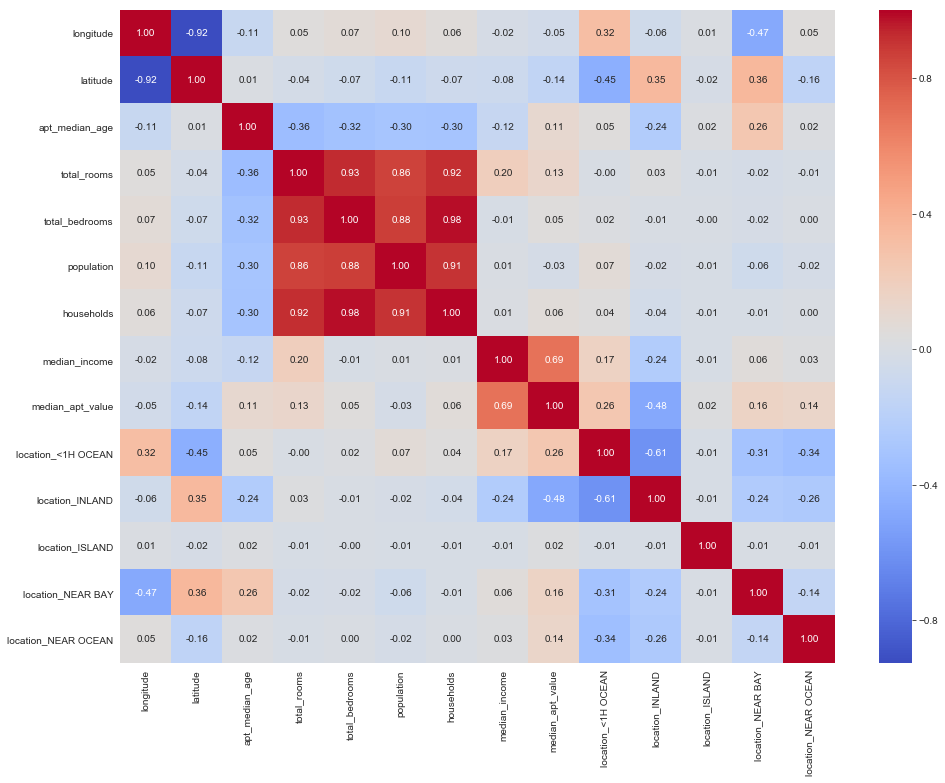

In [113]:
get_corr_plot(df)

In [114]:
return_shape_dataframe(df)

(20433, 14)

# Prediction

### Find a model that can predict the median price of apartments based on other features in the 'apt_pricing.csv' data set. 

In [115]:
columnsList = ['longitude','latitude']
df = df.drop(columnsList,axis=1)

In [21]:
## Question
# Apply a transformation to the numerical columns so they all have mean of 0 and variance of 1.


In [117]:
df.head()
# import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)


In [119]:
scaled_df = pd.DataFrame(x_scaled, columns = df.columns)

In [120]:
scaled_df.isnull().sum()

apt_median_age         0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_apt_value       0
location_<1H OCEAN     0
location_INLAND        0
location_ISLAND        0
location_NEAR BAY      0
location_NEAR OCEAN    0
dtype: int64

In [121]:
scaled_df.shape

(20433, 12)

In [122]:
df.shape

(20433, 12)

In [123]:
ocean_list = df['location_<1H OCEAN'].values.tolist()
inland_list = df['location_INLAND'].values.tolist()
island_list = df['location_ISLAND'].values.tolist()
bay_list = df['location_NEAR BAY'].values.tolist()
near_ocean_list = df['location_NEAR OCEAN'].values.tolist()

In [124]:
scaled_df['location_<1H OCEAN'] = ocean_list
scaled_df['location_INLAND'] = inland_list
scaled_df['location_ISLAND'] = island_list
scaled_df['location_NEAR BAY'] = bay_list
scaled_df['location_NEAR OCEAN'] = near_ocean_list
scaled_df.isnull().sum()

apt_median_age         0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_apt_value       0
location_<1H OCEAN     0
location_INLAND        0
location_ISLAND        0
location_NEAR BAY      0
location_NEAR OCEAN    0
dtype: int64

In [126]:
df = scaled_df.copy()

In [127]:
df.isnull().sum()

apt_median_age         0
total_rooms            0
total_bedrooms         0
population             0
households             0
median_income          0
median_apt_value       0
location_<1H OCEAN     0
location_INLAND        0
location_ISLAND        0
location_NEAR BAY      0
location_NEAR OCEAN    0
dtype: int64

In [128]:
def OLS_regression(dataframe,features_list,target_col):
    '''
    params : A dataframe whose columns need to be sliced for separating target and feature columns, list of feature columns and a target column
    returns: An OLS table and metrics of the regression
    '''
    X = dataframe[features_list]
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    model = sm.OLS(y, X)
    results = model.fit()
    # Statsmodels gives R-like statistical output
    return results.summary()

In [129]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
OLS_regression(df,features_list,target_col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       median_apt_value   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3545.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:21:45   Log-Likelihood:                -18711.
No. Observations:               20433   AIC:                         3.744e+04
Df Residuals:                   20422   BIC:                         3.753e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
apt_median_age          0.1293      0.005     26.692      0.000       0.120       0.139
total_rooms            -0.1422      0.015     -9.375      0.000      -0.172      -0.112
total_bedrooms          0.2968      0.025     11.754      0.000       0.247       0.346
population             -0.3632      0.011    -34.003      0.000      -0.384      -0.342
households              0.2542      0.025     10.257      0.000       0.206       0.303
median_income           0.6658      0.006    118.969      0.000       0.655       0.677
location_<1H OCEAN      0.1679      0.007     25.586      0.000       0.155       0.181
location_INLAND        -0.4214      0.008    -51.628      0.000      -0.437      -0.405
location_ISLAND         1.6766      0.271      6.196      0.000       1.146       2.207
location_NEAR BAY       0.2058      0.013     15.493      0.000       0.180       0.232
location_NEAR OCEAN     0.2837      0.012     23.975      0.000       0.260       0.307
==============================================================================
Omnibus:                     4896.697   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17394.612
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.854   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  *** Used ols model understand feature significance-
  All the features show significant t statistics with households as a slightly skeptical t-stat

In [130]:
def Linear_Regression(dataframe, features_list, target_col):
    '''
    params : A dataframe whose columns need to be sliced for separating target and feature columns, list of feature columns and a target column
    returns: Metrics for evaluating the regression model fit and it's predictions
    '''
    X = dataframe[features_list]
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    print('The score of the model is {}'.format(linreg.score(X_test,y_test)))
    predictions = linreg.predict(X_test)
    mse = mean_squared_error(predictions, y_test)
    rmse = np.sqrt(mse)
    print('The Root Mean Square of the Linear Regression Model is {}'.format(rmse))
    original_predicted = pd.DataFrame()
    original_predicted['original'] = y_test
    original_predicted['predicted'] = predictions
    return original_predicted, rmse

In [131]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
original_predicted, rmse = Linear_Regression(df,features_list,target_col)

The score of the model is 0.6435804658803739
The Root Mean Square of the Linear Regression Model is 0.5955418857112956


In [132]:
original_predicted.head()

,original,predicted
14278,0.337301,0.000331
16224,-0.597442,-0.613232
7646,0.098201,0.044545
1402,0.120725,-0.179592
1328,-0.315027,-0.400705


#### *** Considering all the feature and applying Linear Regression. Using this as a base model


#### Using RMSE as accuracy metric


In [133]:
def apply_ridge(dataframe,features_list,target_col, alpha):
    '''
    params : A dataframe whose columns need to be sliced for separating target and feature columns, list of feature columns, target column and alpha value for ridge
    returns: Metrics for evaluating the regression model fit and it's predictions
    '''
    X = dataframe[features_list]
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    #Ridge Regression with alpha = 0.01
    rr = Ridge(alpha=alpha) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
    # restricted and in this case linear and ridge regression resembles
    rr.fit(X_train, y_train)
    print('The score of the model is {}'. format(rr.score(X_test, y_test)))
    predictions= rr.predict(X_test)
    mse = mean_squared_error(predictions, y_test)
    rmse = np.sqrt(mse)
    print('The Root Mean Square of the Ridge Linear Regression Model is {}'.format(rmse))
    original_predicted = pd.DataFrame()
    original_predicted['original'] = y_test
    original_predicted['predicted'] = predictions
    return original_predicted, rmse

In [134]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
original_predicted_rr, rr_rmse = apply_ridge(df,features_list,target_col,0.01)

The score of the model is 0.6435842723193363
The Root Mean Square of the Ridge Linear Regression Model is 0.5955387056107779


In [135]:
original_predicted_rr.head()

,original,predicted
14278,0.337301,0.000330
16224,-0.597442,-0.613232
7646,0.098201,0.044545
1402,0.120725,-0.179590
1328,-0.315027,-0.400708


#### *** Applying Ridge dosent  improve anything

In [136]:
#Ridge Regression with alpha = 100
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
original_predicted_rr, rr_rmse = apply_ridge(df,features_list,target_col,100)

The score of the model is 0.6421927226262611
The Root Mean Square of the Ridge Linear Regression Model is 0.5967001504094543


In [137]:
original_predicted_rr.head()

,original,predicted
14278,0.337301,-0.014458
16224,-0.597442,-0.594820
7646,0.098201,0.042210
1402,0.120725,-0.180850
1328,-0.315027,-0.415221


### Changing Feature 

In [138]:
features_list = ['location_<1H OCEAN','median_income','location_INLAND']
target_col = 'median_apt_value'
original_predicted, rmse = Linear_Regression(df,features_list,target_col)

The score of the model is 0.5948748627723635
The Root Mean Square of the Linear Regression Model is 0.6349304540077451


In [139]:
original_predicted.head()

,original,predicted
14278,0.337301,0.111431
16224,-0.597442,-0.307225
7646,0.098201,-0.024701
1402,0.120725,0.018565
1328,-0.315027,-0.429911


### Random Forrest

In [140]:
def RandomForestRegression(dataframe, features_list,target_col):
    '''
    params : A dataframe whose columns need to be sliced for separating target and feature columns, list of feature columns, target column and alpha value for Random Forest Regression
    returns: Metrics for evaluating the random forest regression model fit and it's predictions
    '''
    X = dataframe[features_list]
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    rf = RandomForestRegressor(n_estimators=20, random_state=1)
    rf.fit(X_train,y_train)
    print('The Score of the model is {}'.format(rf.score(X_test,y_test)))
    predictions = rf.predict(X_test)
    mse = mean_squared_error(predictions, y_test)
    rmse = np.sqrt(mse)
    print('The Root Mean Square of the Ridge Linear Regression Model is {}'.format(rmse))
    original_predicted = pd.DataFrame()
    original_predicted['original'] = y_test
    original_predicted['predicted'] = predictions
    return original_predicted, rmse

In [141]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
original_predicted_rf, rmse_rf = RandomForestRegression(df,features_list,target_col)

The Score of the model is 0.7096542793006742
The Root Mean Square of the Ridge Linear Regression Model is 0.5375133775707124


In [142]:
original_predicted_rf.head()

,original,predicted
14278,0.337301,0.229836
16224,-0.597442,-0.508386
7646,0.098201,-0.123876
1402,0.120725,-0.660336
1328,-0.315027,-0.351931


#### By hit and trial decresing the feature set to highly corelated variable gives to the targget and applying Lineear regression increses the accuracy but random forest gives the best accuracy.

# EDA


### ***Below graph displays the data points on a geosaptial Map using the longitude and latitude

In [143]:
df_eda = pd.read_csv('apt_pricing.csv')

In [144]:
locations = list(zip(df_eda.latitude, df_eda.longitude))
Lat =37.76
Long= -122.45
map1 = folium.Map(location=[Lat,Long],zoom_start=8)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [145]:
df_eda["location"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: location, dtype: int64

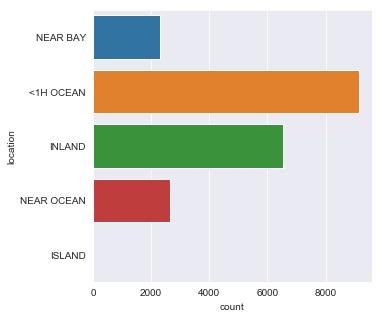

In [146]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(y="location",data=df_eda)

plt.show()

### **The above plot shows that large chunk of the population lives less than 1 hour way from ocean

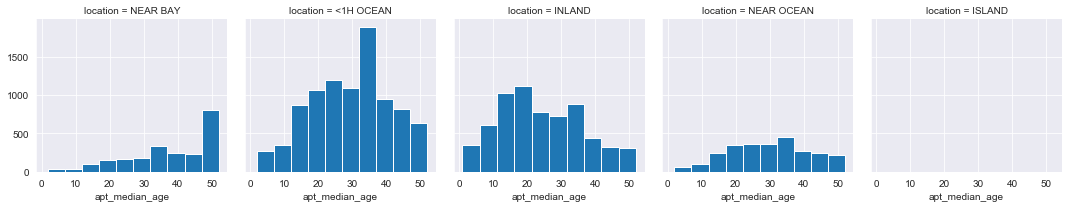

In [147]:
g=sns.FacetGrid(df_eda, col="location")
g=g.map(plt.hist, "apt_median_age")
plt.show()

#### *** The above chart shows the age distribution of the poulation in different  locations

##### Near Bay the disribution peaks at 50 year age , in <1H ocean it peaks around 35, in INLAND it peaks around 20 , Near Ocean has fairly normal distribution and island no significant data points.

##### This concludes that Near Bay area there is mainly old population and youner people around 35 live <1H Ocean.

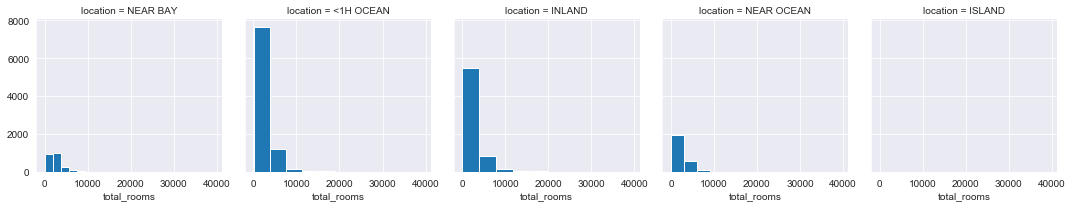

In [148]:
g=sns.FacetGrid(df_eda, col="location")
g=g.map(plt.hist, "total_rooms")
plt.show()

#### *** From the above plot we can infer tht their are more rooms <1H away  from ocean

In [149]:
df_population_total = df_eda.groupby(["location"])['population','total_rooms','total_bedrooms','households','median_apt_value'].sum()


In [151]:
df_population_total['contribution'] = df_population_total["population"]/df_population_total.population.sum()
df_population_total['avg_no_of_members']=df_population_total["population"]/df_population_total["households"]
df_apt_val = df_eda.groupby(["location"])["median_apt_value"].mean()
df_apt_val = df_apt_val.to_frame()

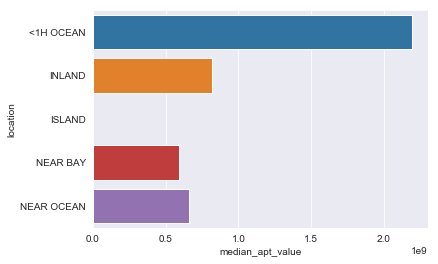

In [152]:
ax = sns.barplot(y=df_population_total.index, x="median_apt_value", data=df_population_total)

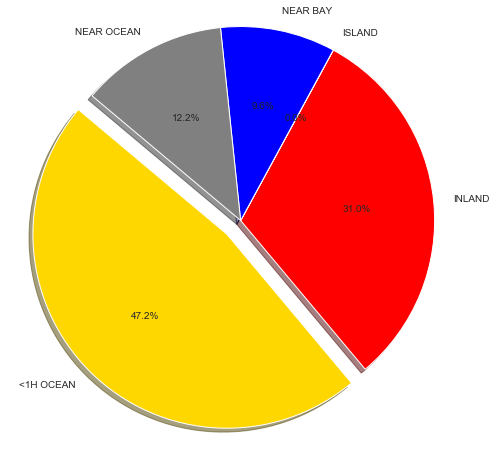

In [153]:
# Data to plot
labels = '<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'
plt.figure(figsize=(8,8))
sizes = df_population_total["population"]
colors = ['gold', 'red', 'lightcoral','blue','grey']
explode = (0.1, 0,0,0,0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels = labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### **The above pie chart shows us again that large chunk of population lives <1H away from ocean

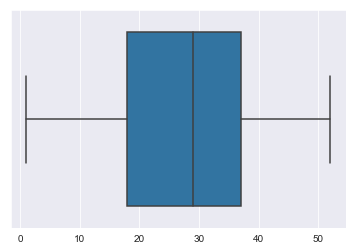

In [154]:
sns.boxplot(np.array(df_eda['apt_median_age']))

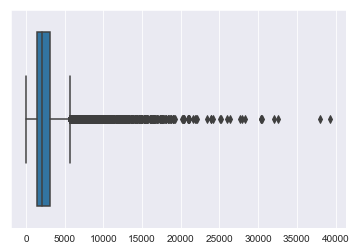

In [155]:
sns.boxplot(np.array(df_eda['total_rooms']))

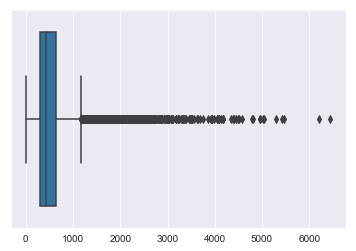

In [156]:
sns.boxplot(np.array(df_eda['total_bedrooms']))

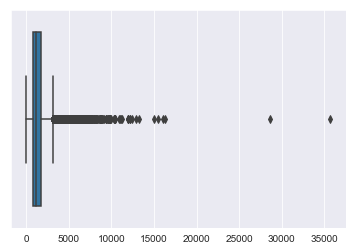

In [157]:
sns.boxplot(np.array(df_eda['population']))

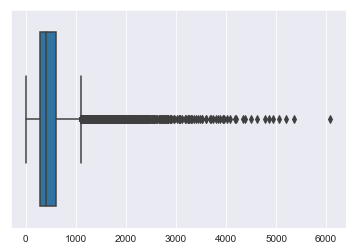

In [158]:
sns.boxplot(np.array(df_eda['households']))

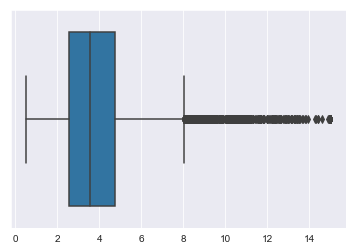

In [159]:
sns.boxplot(np.array(df_eda['median_income']))

#### **It can be observed from the above boxplots that there are large number of outliers in all the columns except median age


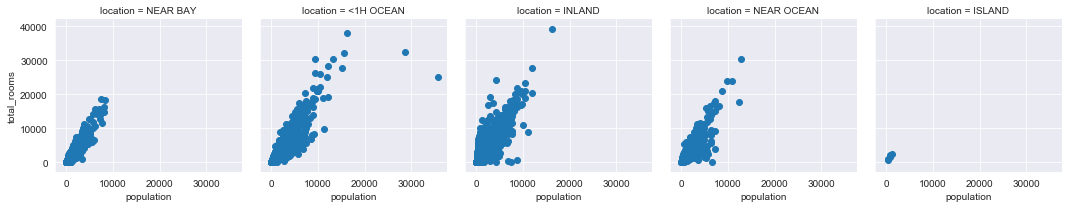

In [160]:
g=sns.FacetGrid(df_eda, col="location")
g=g.map(plt.scatter, "population", "total_rooms")
plt.show()

### Training / Model Evaluation

### Choose a tree-based regressor with default parameters to perform training on the data. Use 10-fold Cross Validation. 
### Set the total number of trees to be 10.
### Choose the proper metric to evaluate the accuracy of your model. 

### KFold

In [161]:
def KFold_rf(dataframe,features_list, target_col):
    '''
    params : A dataframe whose columns need to be sliced for separating target and feature columns, list of feature columns, target column and alpha value for KFold Cross Validation
    returns: Metrics for evaluating the K-Fold Cross Validation
    '''
    X = dataframe[features_list]
    y = dataframe[target_col]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    regressor_rf = RandomForestRegressor(n_estimators=10, random_state=1)
    scores = []
    RMSE_Krf =[]
    cv = KFold(n_splits=10, random_state= None, shuffle=False)
    for train_index, test_index in cv.split(y):
        print("Train Index: ", train_index, "\n")
        print("Test Index: ", test_index)
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        regressor_rf.fit(X_train, y_train)
        scores.append(regressor_rf.score(X_test, y_test))
        y_pred = regressor_rf.predict(X_test)
        RMSE_Krf.append(mean_squared_error(y_pred, y_test) ** 0.5)
    print('The mean score of the cross validated model is {}'.format(np.mean(scores)))
    print('The mean RMSE of the cross validated model is {}'.format(np.mean(RMSE_Krf)))
    return np.mean(scores), np.mean(RMSE_Krf)

In [162]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
score_kfold, rmse_kfold = KFold_rf(df,features_list,target_col)

Train Index:  [ 2044  2045  2046 ... 20430 20431 20432] 

Test Index:  [   0    1    2 ... 2041 2042 2043]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [2044 2045 2046 ... 4085 4086 4087]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [4088 4089 4090 ... 6129 6130 6131]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [6132 6133 6134 ... 8172 8173 8174]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [ 8175  8176  8177 ... 10215 10216 10217]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [10218 10219 10220 ... 12258 12259 12260]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [12261 12262 12263 ... 14301 14302 14303]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [14304 14305 14306 ... 16344 16345 16346]
Train Index:  [    0     1     2 ... 20430 20431 20432] 

Test Index:  [16347 16348 16349 ... 18387 18388 18389]
Train I

###  Use the tree-based regressor to determine the most important features that impact the prediction accuracy.

In [163]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
X = df[features_list]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
sel = SelectFromModel(RandomForestRegressor(n_estimators = 10))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [165]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['median_income', 'location_INLAND'], dtype='object')


### Use a different machine learning approach to find the most important features in the dataset.
###  Compare the results with your findings from the tree-based regressor model.

#### Variance Inflation Factor

In [166]:
# For each X, calculate VIF and save in dataframe
Xvif = X[['apt_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'location_<1H OCEAN','location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]
vif["features"] = Xvif.columns
vif.round(1)

,VIF Factor,features
0,1.3,apt_median_age
1,12.8,total_rooms
2,35.6,total_bedrooms
3,6.4,population
4,34.3,households
5,1.7,median_income
6,1.1,location_<1H OCEAN
7,1.2,location_INLAND
8,1.0,location_ISLAND
9,1.1,location_NEAR BAY


In [167]:
Xvif1 = X[['apt_median_age', 'total_rooms', 'population', 'households', 'median_income',
        'location_<1H OCEAN','location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']]
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(Xvif1.values, i) for i in range(Xvif1.shape[1])]
vif1["features"] = Xvif1.columns
vif1.round(1)

,VIF Factor,features
0,1.3,apt_median_age
1,9.6,total_rooms
2,6.0,population
3,11.7,households
4,1.5,median_income
5,1.1,location_<1H OCEAN
6,1.2,location_INLAND
7,1.0,location_ISLAND
8,1.1,location_NEAR BAY
9,1.0,location_NEAR OCEAN


In [168]:
Xvif2 = X[['apt_median_age', 'total_rooms', 'population', 'median_income',
        'location_<1H OCEAN','location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']]
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(Xvif2.values, i) for i in range(Xvif2.shape[1])]
vif2["features"] = Xvif2.columns
vif2.round(1)

,VIF Factor,features
0,1.3,apt_median_age
1,4.8,total_rooms
2,4.5,population
3,1.3,median_income
4,1.1,location_<1H OCEAN
5,1.1,location_INLAND
6,1.0,location_ISLAND
7,1.1,location_NEAR BAY
8,1.0,location_NEAR OCEAN


In [169]:
Xvif3 = X[['apt_median_age', 'total_rooms', 'population', 'median_income',
        'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']]
vif3 = pd.DataFrame()
vif3["VIF Factor"] = [variance_inflation_factor(Xvif3.values, i) for i in range(Xvif3.shape[1])]
vif3["features"] = Xvif3.columns
vif3.round(1)

,VIF Factor,features
0,1.3,apt_median_age
1,4.6,total_rooms
2,4.3,population
3,1.3,median_income
4,1.1,location_INLAND
5,1.0,location_ISLAND
6,1.1,location_NEAR BAY
7,1.0,location_NEAR OCEAN


In [170]:
Xvif4 = X[['apt_median_age','population', 'median_income',
        'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']]
vif4 = pd.DataFrame()
vif4["VIF Factor"] = [variance_inflation_factor(Xvif4.values, i) for i in range(Xvif4.shape[1])]
vif4["features"] = Xvif4.columns
vif4.round(1)

,VIF Factor,features
0,1.3,apt_median_age
1,1.1,population
2,1.1,median_income
3,1.1,location_INLAND
4,1.0,location_ISLAND
5,1.1,location_NEAR BAY
6,1.0,location_NEAR OCEAN


#### Using VIF factor we remove one by all those features whose score is greater than 0
#### **Using variance Inflation Factor we can conculde that  apt_median_age, population, median_income, location_INLAND, location_ISLAND, location_NEAR BAY and location_NEAR OCEAN are the most important features

#### Colinearity

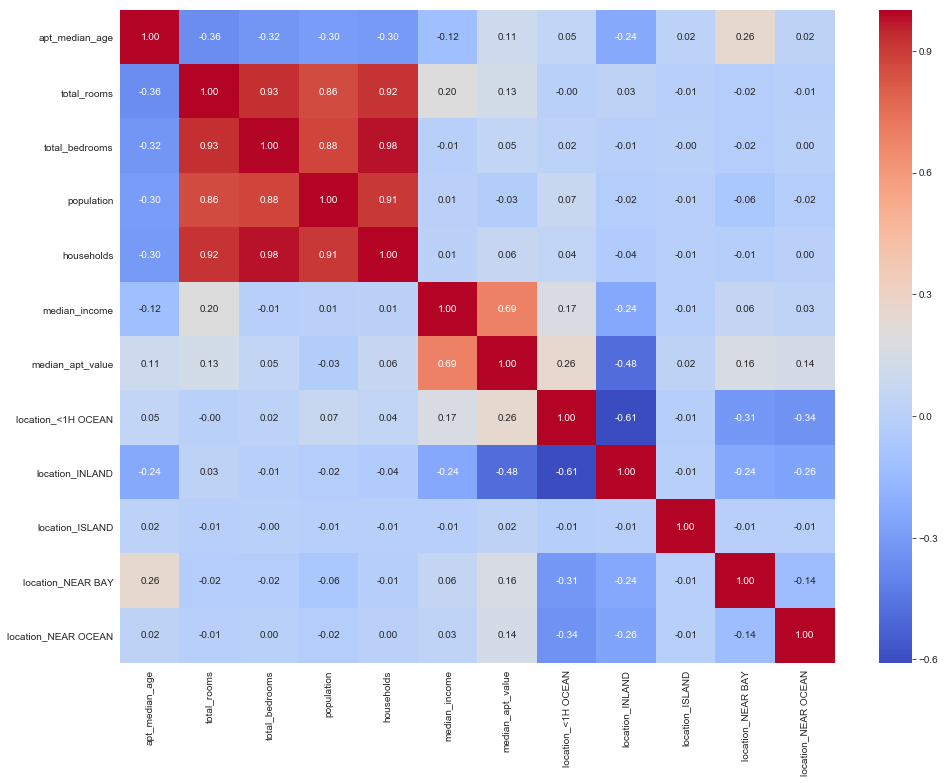

In [171]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### **** colinearity we can conclude that median_income and location_<1H OCEAN, location_INLAND are also important features

#### Random forest sugests the follwoing as best features-
1.median_income
2.location_INLAND

#### VIF and Colinearity approach suggest-
1.apt_median_age
2.population
3.median_income
4.location_INLAND
5.location_ISLAND
6.location_NEAR BAY
7.location_NEAR OCEAN

## Fix the total number max depth of the tree  (N) to be 10  and let the max depth of the tree (d) to vary from 2 to 10 in steps of 2 .
## Find out the choice of 'd' that result in the best prediciton accuracy.  (Assume 5 fold cross validation)

In [172]:
def kfold_rf(dataframe,features_list,target_col):
    depth_trees = [i for i in range(2,12,2)]
    scores = []
    rmses_list = []
    X = df[features_list]
    y = df[target_col]
    # train test spliting of data set
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    for depth in depth_trees:
        kf = KFold(5, shuffle=True, random_state=1)
        rf = RandomForestRegressor(n_estimators=10, max_depth=depth, random_state=1)
        mses = cross_val_score(rf, X_train, y_train, scoring ="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmses = np.mean(rmses)
        print('Root Mean Squre of the 5 fold CV of depth {} is {}'.format(depth,avg_rmses))
        std_rmse = np.std(rmses)
        avg_rmse = np.mean(rmses)
        rmses_list.append(avg_rmse)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test)
        scores.append(rf.score(X_test,y_test))
        print('========Depth of Trees {} ========'.format(depth))
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        original_predicted = pd.DataFrame()
        original_predicted['original_values'] = y_test
        original_predicted['predicted_values'] = y_pred
        original_predicted['squared_error'] = (original_predicted['original_values'] - original_predicted['predicted_values'])** 2

In [173]:
features_list = ['apt_median_age', 'total_rooms', 'total_bedrooms', 'population',
                 'households', 'median_income','location_<1H OCEAN',
                 'location_INLAND', 'location_ISLAND', 'location_NEAR BAY','location_NEAR OCEAN']
target_col = 'median_apt_value'
kfold_rf(df,features_list,target_col)

Root Mean Squre of the 5 fold CV of depth 2 is 0.7024606615474976
========Depth of Trees 2 ========
Mean Absolute Error: 0.5270530390821866
Mean Squared Error: 0.48900948932908217
Root Mean Squared Error: 0.6992921344681936
Root Mean Squre of the 5 fold CV of depth 4 is 0.6235722653676893
========Depth of Trees 4 ========
Mean Absolute Error: 0.44920001870374077
Mean Squared Error: 0.3837272321365858
Root Mean Squared Error: 0.6194572076718341
Root Mean Squre of the 5 fold CV of depth 6 is 0.5981467609553699
========Depth of Trees 6 ========
Mean Absolute Error: 0.4253625587894466
Mean Squared Error: 0.3526670414303834
Root Mean Squared Error: 0.5938577619517854
Root Mean Squre of the 5 fold CV of depth 8 is 0.5746913084296159
========Depth of Trees 8 ========
Mean Absolute Error: 0.40516835720217903
Mean Squared Error: 0.32565394947847814
Root Mean Squared Error: 0.5706609759554951
Root Mean Squre of the 5 fold CV of depth 10 is 0.5605863350811958
========Depth of Trees 10 ========
Me

### *** At the depth of 10 the model gives the best RMSE